In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
from math import ceil
from datetime import datetime

# Viz libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Ml libraries
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier
import cv2



In [4]:
train = pd.read_csv("Bank-full.csv" , delimiter = ';')

In [5]:
train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#Lets see if the target class is balanced or unbalanced
val = train['y'].value_counts()
print(train['y'].value_counts().values)

[39922  5289]


In [9]:
def make_autopct(values):
   

    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))

        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)

    return my_autopct


In [10]:
def donut_plot(df, col, label_names, ax, text='', colors=['crimson', 'navy'], circle_radius=0.8,
            title= f'Thread Graph'):


    # Return two values and definition of the figure
    values = df[col].value_counts().values
    center_circle = plt.Circle((0, 0), circle_radius, color='white')

    # Plotting thread graph
    ax.pie(values, labels=label_names, colors=colors, autopct=make_autopct(values))
    ax.add_artist(center_circle)

    # Setting arguments of central text
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    ax.set_title(title, size=14, color='dimgrey')

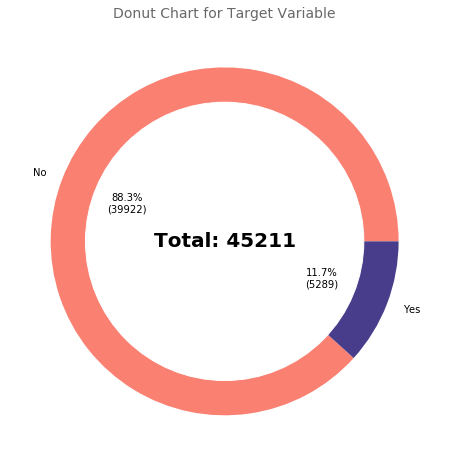

In [11]:
# Ploting a donut chart with the target variable
label_names = ['No', 'Yes']
color_list = ['salmon', 'darkslateblue']

fig, ax = plt.subplots(figsize=(8, 8))
title = 'Donut Chart for Target Variable'
donut_plot(train, 'y', label_names, ax=ax, text=f'Total: {len(train)}', colors=color_list, title=title)
plt.show()

In [12]:
#converting the target variable to 1 and 0 by using Replace encoding
train['y'] = train['y'].map({'yes':1, 'no':0})
train['y'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: y, dtype: int64

So the data is unbalanced, hence we have to keep that in mind and either go for oversampling or giving weights to the algorithm that we are applying.

In [13]:
#categorical variables:

categorical = train.dtypes[train.dtypes == "object"].index

print(categorical)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [14]:
# Visualizing the categorical features
cat_features = [col for col, dtype in train.dtypes.items() if dtype == 'object']
type(cat_features)

cat_features
#sns.catplot(data = train[cat_features],  hue= train['y'], kind = 'strip', palette=['salmon', 'darkslateblue'])

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

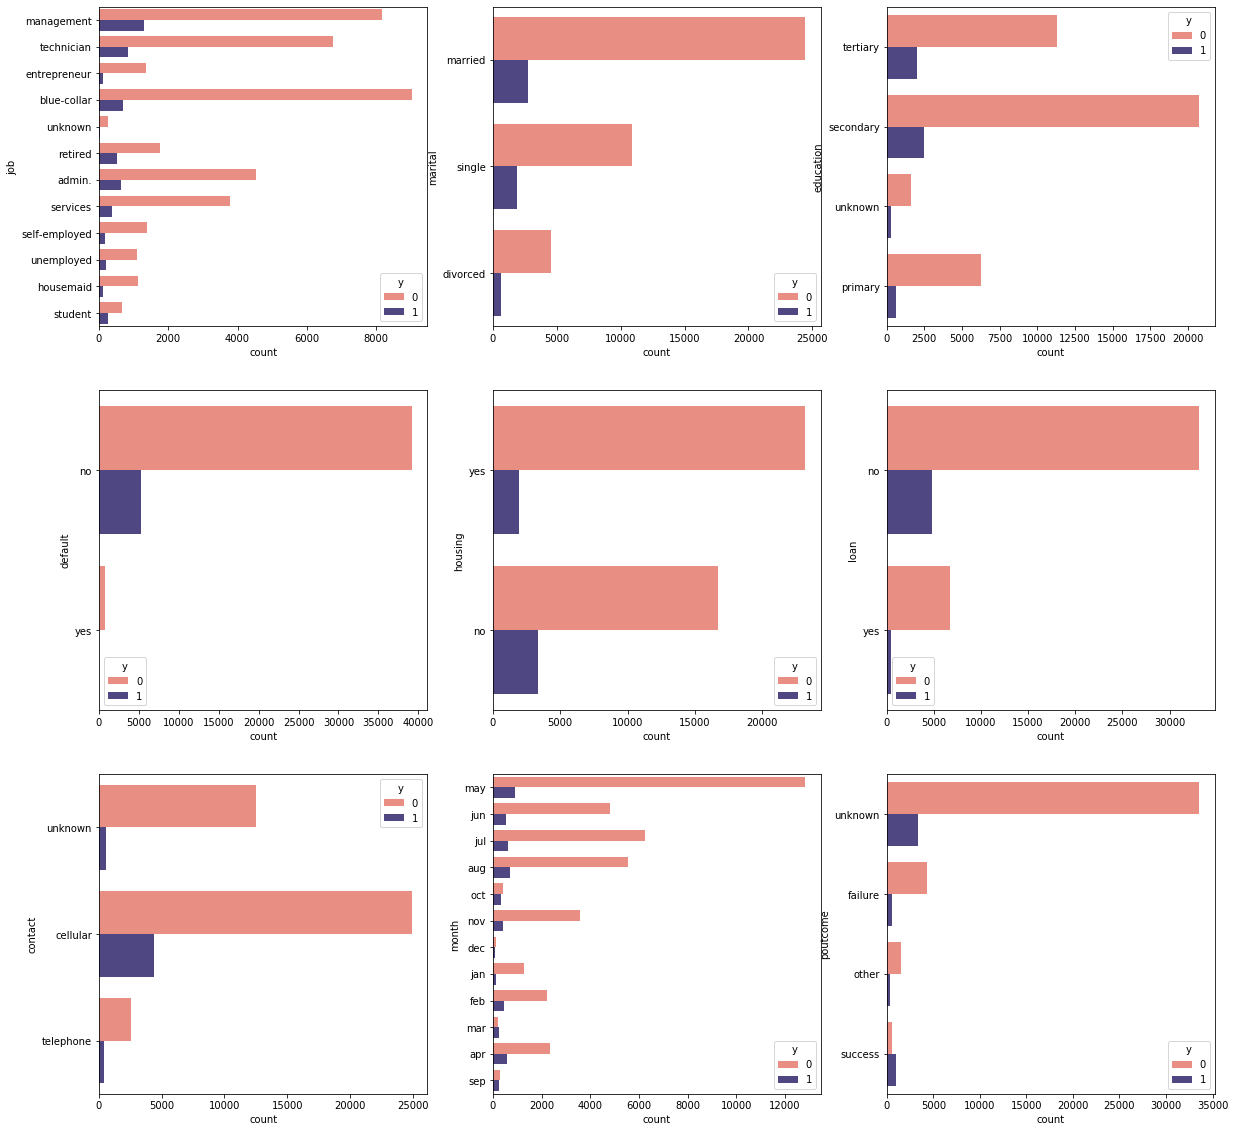

In [15]:
figsize = (20,20)

total_cols = len(cat_features)
fig_cols = 3
fig_rows = ceil(total_cols / fig_cols)
ncount = len(cat_features)
    
fig,axs = plt.subplots(nrows = fig_rows , ncols = fig_cols , figsize = (figsize))

c = 1
for i in range(fig_rows):
    for j in range(fig_cols):
        col = cat_features[c-1]
        exec("m = 22*10+ %d" %(c))
        sns.countplot(y = col , hue = 'y' , data = train ,palette = ['salmon', 'darkslateblue'],ax = axs[i,j])
        c = c + 1
        
    
    
    
plt.show()

In [16]:
train[cat_features].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


This gives us the details about catagorical features like the unique values of features etc etc

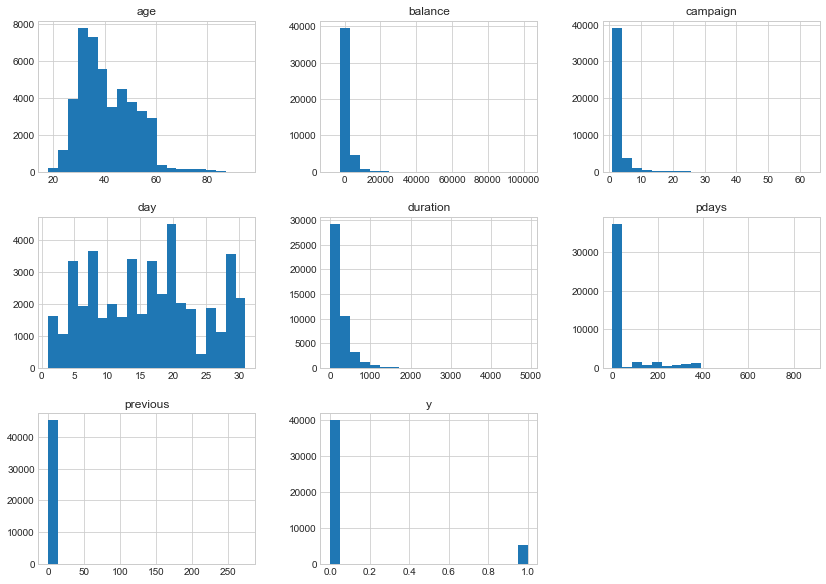

In [17]:
# Let's see how the numeric data is distributed.
plt.style.use('seaborn-whitegrid')
#plt.style.use('dark_background')
train.hist(bins=20, figsize=(14,10))
plt.show()

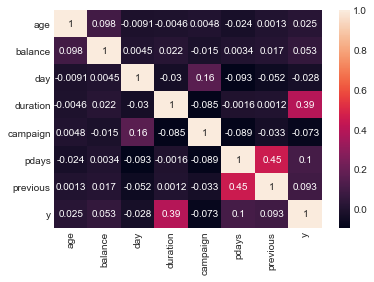

In [18]:
sns.heatmap(train.corr(), annot = True)

## Data Preperation
 As we can see that duration is having the highest correlation on our target variable, however to make the model generic i.e. we can predict the customer before calling him/her we can drop the feature.

In [19]:
train = train.drop(['duration','day','month'], axis = 1)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.8+ MB


Lets have a look a age column and see what meaningfull we can get from it.

In [21]:
train['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

we can divide the ages into 4 groups "child" , 'adult' , 'Middle-aged' and 'old'. And Then it can be One-Hot Encoded

In [22]:
def impute_age(data):
    if (data['age'] < 18):
        return 'Child'
    elif((data['age'] < 35) & (data['age'] >= 18)):
        return 'Adult'
    elif((data['age'] < 60)) & (data['age'] >= 35):
        return 'Middle-Aged'
    else:
        return 'Old'
    

In [23]:
train['age'] = train.apply(impute_age , axis = 1)

In [24]:
train['age']

0        Middle-Aged
1        Middle-Aged
2              Adult
3        Middle-Aged
4              Adult
            ...     
45206    Middle-Aged
45207            Old
45208            Old
45209    Middle-Aged
45210    Middle-Aged
Name: age, Length: 45211, dtype: object

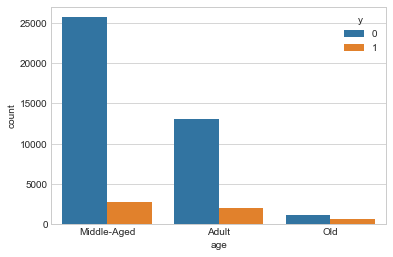

In [25]:
sns.countplot(data=train ,x = 'age' ,  hue = 'y')

Now, lets have a look on the column job

In [26]:
train['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

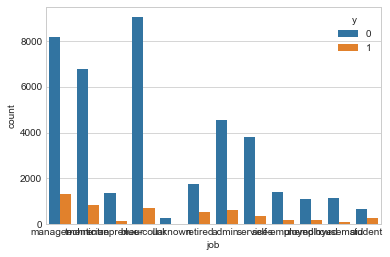

In [27]:
sns.countplot(data = train , x = 'job' ,  hue = 'y')

In [28]:
#we can combine similar jobs into categories
train['job'] = train['job'].replace(['management', 'admin.'], 'admin/manag')
train['job'] = train['job'].replace(['services','housemaid'], 'home/service')
train['job'] = train['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'unemployed')

In [29]:
train['job'].value_counts()

admin/manag      14629
blue-collar       9732
technician        7597
home/service      5394
unemployed        4793
self-employed     1579
entrepreneur      1487
Name: job, dtype: int64

Now, these can be One-Hot Encoded into 7 different columns

Lets have a look at poutcome column

In [30]:
train['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [31]:
# combine other and unknown category into failure because only success and failure matters
train['poutcome'] = train['poutcome'].replace(['other'] , 'failure')
train['poutcome'] = train['poutcome'].replace(['unknown'] , 'failure')
train.poutcome.value_counts()

failure    43700
success     1511
Name: poutcome, dtype: int64

looking at default column

In [32]:
train['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [33]:
train['default'] = train['default'].map( {'yes':1, 'no':0} )
train['default'].value_counts()
train['poutcome'] = train['poutcome'].map( {'success':1, 'failure':0} )

Similarly, taking Housing column into consideration

In [34]:
train['housing']=train['housing'].map({'yes':1, 'no':0})
train['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [35]:
# values for "loan" : yes/no
train["loan"] = train['loan'].map({'yes':1, 'no':0})

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  int64 
 13  y          45211 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 4.8+ MB


## Looking on the Outliars of all the Neumerical Features

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  int64 
 13  y          45211 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 4.8+ MB


In [38]:
numerical = [col for col, dtype in train.dtypes.items() if dtype == 'int64']
numerical


['default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [39]:
numerical = numerical[0:7]
numerical

['default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous']

creating a box plot to identify the outliars of each feature

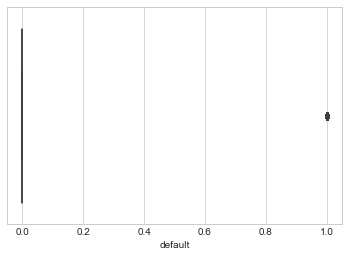

In [40]:
sns.boxplot(data = train, x= 'default')

There are 3 features which can have outliars i.e balance, campaign and pdays

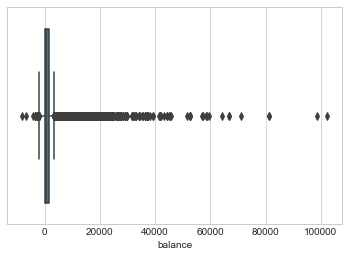

In [41]:
sns.boxplot(data=train, x = 'balance')

We can see that there are 3 values above 80000, hence they are outliars and we can remove them

In [42]:
Bal_fil = train.balance<80000
train = train[Bal_fil]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45207 non-null  object
 1   job        45207 non-null  object
 2   marital    45207 non-null  object
 3   education  45207 non-null  object
 4   default    45207 non-null  int64 
 5   balance    45207 non-null  int64 
 6   housing    45207 non-null  int64 
 7   loan       45207 non-null  int64 
 8   contact    45207 non-null  object
 9   campaign   45207 non-null  int64 
 10  pdays      45207 non-null  int64 
 11  previous   45207 non-null  int64 
 12  poutcome   45207 non-null  int64 
 13  y          45207 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.2+ MB


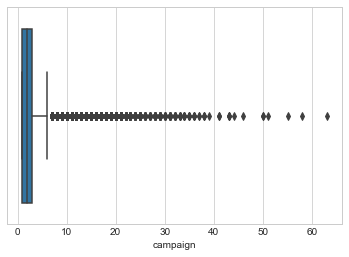

In [43]:
sns.boxplot(data = train, x = 'campaign')

In [44]:
cam_fil = train.campaign<50
train = train[cam_fil]

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45201 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45201 non-null  object
 1   job        45201 non-null  object
 2   marital    45201 non-null  object
 3   education  45201 non-null  object
 4   default    45201 non-null  int64 
 5   balance    45201 non-null  int64 
 6   housing    45201 non-null  int64 
 7   loan       45201 non-null  int64 
 8   contact    45201 non-null  object
 9   campaign   45201 non-null  int64 
 10  pdays      45201 non-null  int64 
 11  previous   45201 non-null  int64 
 12  poutcome   45201 non-null  int64 
 13  y          45201 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.2+ MB


In [46]:
train.pdays.value_counts()

-1      36946
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

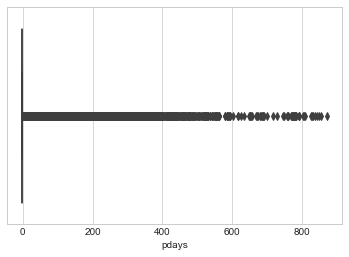

In [47]:
sns.boxplot(data= train, x= 'pdays')

We can also use Z-Score to find and eliminate all the outliars on the condition Z>3

## Now we have to convert all the catagorical features into some meaningfull ones(i.e apply encoding techniques on them)

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [49]:
train.info()
print(train['y'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45201 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45201 non-null  object
 1   job        45201 non-null  object
 2   marital    45201 non-null  object
 3   education  45201 non-null  object
 4   default    45201 non-null  int64 
 5   balance    45201 non-null  int64 
 6   housing    45201 non-null  int64 
 7   loan       45201 non-null  int64 
 8   contact    45201 non-null  object
 9   campaign   45201 non-null  int64 
 10  pdays      45201 non-null  int64 
 11  previous   45201 non-null  int64 
 12  poutcome   45201 non-null  int64 
 13  y          45201 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.2+ MB
0    39914
1     5287
Name: y, dtype: int64


In [50]:
train_2 = train.copy()

In [51]:
def encode_and_bind(orignal_dataframe , feature_to_encode):
    dummies = pd.get_dummies(orignal_dataframe[[feature_to_encode]])
    res = pd.concat([orignal_dataframe , dummies] , axis = 1)
    return res

In [52]:
#train = encode_and_bind(train,'age')
#train = encode_and_bind(train,'job')
#train = encode_and_bind(train,'marital')
#train = encode_and_bind(train,'education')
for i in [col for col, dtype in train.dtypes.items() if dtype == 'object']:
    if i in ['age','job','marital','education','contact']:
        train = encode_and_bind(train, i)
    
    


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45201 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45201 non-null  object
 1   job                  45201 non-null  object
 2   marital              45201 non-null  object
 3   education            45201 non-null  object
 4   default              45201 non-null  int64 
 5   balance              45201 non-null  int64 
 6   housing              45201 non-null  int64 
 7   loan                 45201 non-null  int64 
 8   contact              45201 non-null  object
 9   campaign             45201 non-null  int64 
 10  pdays                45201 non-null  int64 
 11  previous             45201 non-null  int64 
 12  poutcome             45201 non-null  int64 
 13  y                    45201 non-null  int64 
 14  age_Adult            45201 non-null  uint8 
 15  age_Middle-Aged      45201 non-null  uint8 
 16  age_

We must now remove orignal features and keep only the encoded ones.

In [54]:
train = train.drop(['age','job','marital','education','contact'], axis = 1)

Now we have to seperate the features and target variable(i.e. 'y' in our case)

In [55]:
predictors = train.drop('y', axis = 1)
to_predict = train['y']

Reserving some of the part of data for validation using train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(predictors,to_predict,test_size = 0.2 , random_state = 0)

Now we have to go for oversampling of the data. As we have already seen, we have class imbalance in our target variable.
Note: we should always do oversampling and undersampling after splitting the data into test and train, so that we can accurately check how it is perfroming on the reserved test samples.

In [57]:
from imblearn.over_sampling import SMOTE,ADASYN

In [58]:
X_resampled , y_resampled = SMOTE().fit_resample(X_train, y_train)

In [59]:
#X_train.groupby(['job','y']).size().unstack()
X_resampled.shape

(63880, 28)

Now, as we have all the catagorical features converted into Neumerical ones. Over-sampling is done. Before creating a mode we need to normalize all the inputs or features that we have. we do this by scaling the data.

In [60]:
# scaling of data
scaler = StandardScaler().fit(X_resampled)

scaler.mean_
scaler.scale_ 

array([1.02847485e-01, 3.06035774e+03, 4.86065347e-01, 2.96184438e-01,
       2.53815725e+00, 1.07717664e+02, 2.26983782e+00, 2.50050192e-01,
       4.39700947e-01, 4.99540509e-01, 1.73390471e-01, 4.32478142e-01,
       3.38913035e-01, 1.37035510e-01, 2.58892870e-01, 1.42150408e-01,
       3.12757027e-01, 2.72780294e-01, 2.62809490e-01, 4.99026644e-01,
       4.18956233e-01, 2.88960528e-01, 4.89012819e-01, 4.26105040e-01,
       1.56410425e-01, 4.69641515e-01, 1.97997143e-01, 3.75844453e-01])

In [61]:
X_resampled = pd.DataFrame(scaler.transform(X_resampled))

In [62]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.103959,-0.293901,-0.787508,3.048214,4.600830,-0.490695,-0.331344,-0.268011,-0.595768,1.043821,-0.178943,-0.575928,2.559982,-0.13971,-0.279053,-0.145145,-0.35137,-0.296811,-0.284008,1.064439,-0.542056,3.142458,-0.809299,-0.559487,-0.160436,0.699317,-0.206435,-0.452956
1,-0.103959,-0.355005,-0.787508,-0.328061,2.630897,-0.490695,-0.331344,-0.268011,1.678505,-0.958019,-0.178943,-0.575928,-0.390628,-0.13971,-0.279053,-0.145145,2.84600,-0.296811,-0.284008,-0.939462,1.844828,-0.318222,1.235637,-0.559487,-0.160436,0.699317,-0.206435,-0.452956
2,-0.103959,0.019134,1.269829,-0.328061,0.266977,-0.490695,-0.331344,-0.268011,-0.595768,1.043821,-0.178943,1.736327,-0.390628,-0.13971,-0.279053,-0.145145,-0.35137,-0.296811,-0.284008,1.064439,-0.542056,-0.318222,1.235637,-0.559487,-0.160436,-1.429967,-0.206435,2.207719
3,-0.103959,-0.598441,1.269829,3.048214,1.054950,-0.490695,-0.331344,-0.268011,1.678505,-0.958019,-0.178943,-0.575928,2.559982,-0.13971,-0.279053,-0.145145,-0.35137,-0.296811,-0.284008,-0.939462,1.844828,-0.318222,1.235637,-0.559487,-0.160436,0.699317,-0.206435,-0.452956
4,-0.103959,-0.155355,1.269829,-0.328061,-0.127009,-0.490695,-0.331344,-0.268011,1.678505,-0.958019,-0.178943,-0.575928,2.559982,-0.13971,-0.279053,-0.145145,-0.35137,-0.296811,-0.284008,-0.939462,1.844828,-0.318222,1.235637,-0.559487,-0.160436,-1.429967,-0.206435,2.207719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63875,-0.103959,0.445882,-0.787508,-0.328061,-0.520996,1.319593,0.549776,-0.268011,-0.595768,-0.958019,-0.178943,-0.575928,-0.390628,-0.13971,-0.279053,-0.145145,-0.35137,-0.296811,-0.284008,-0.939462,-0.542056,-0.318222,-0.809299,-0.559487,-0.160436,0.699317,-0.206435,-0.452956
63876,-0.103959,0.624946,-0.787508,-0.328061,-0.520996,-0.490695,-0.331344,-0.268011,-0.595768,-0.958019,-0.178943,-0.575928,-0.390628,-0.13971,-0.279053,-0.145145,-0.35137,-0.296811,-0.284008,1.064439,-0.542056,-0.318222,-0.809299,-0.559487,-0.160436,-1.429967,-0.206435,-0.452956
63877,-0.103959,-0.227242,-0.787508,-0.328061,-0.520996,-0.490695,-0.331344,-0.268011,-0.595768,-0.958019,-0.178943,-0.575928,-0.390628,-0.13971,-0.279053,-0.145145,-0.35137,-0.296811,-0.284008,-0.939462,-0.542056,-0.318222,-0.809299,-0.559487,-0.160436,-1.429967,-0.206435,-0.452956
63878,-0.103959,-0.074319,-0.787508,-0.328061,0.266977,-0.490695,-0.331344,-0.268011,-0.595768,-0.958019,-0.178943,-0.575928,-0.390628,-0.13971,-0.279053,-0.145145,-0.35137,-0.296811,-0.284008,-0.939462,-0.542056,-0.318222,-0.809299,-0.559487,-0.160436,0.699317,-0.206435,-0.452956


# Predictive Model

Lets create a home made function for evaluating all the model performances

In [63]:
def evaluate_performance(model_name,trained_model, approach ,train_data, test_data , train_target , test_target ,test = False ,  cv=5):
    if test:
        # Returning predictions as test dice
        y_pred = trained_model.predict(test_data)
        y_proba = trained_model.predict_proba(test_data)[:, 1]

        # Returning metrics for the test dice
        accuracy = accuracy_score(test_target, y_pred)
        precision = precision_score(test_target, y_pred)
        recall = recall_score(test_target, y_pred)
        f1 = f1_score(test_target, y_pred)
        auc = roc_auc_score(test_target, y_proba)
        
    else:
        
        # Evaluating the main metrics of the model through cross validation
        accuracy = cross_val_score(trained_model, train_data, train_target, cv=cv,
                                       scoring='accuracy').mean()
        precision = cross_val_score(trained_model, train_data, train_target, cv=cv,
                                        scoring='precision').mean()
        recall = cross_val_score(trained_model, train_data, train_target, cv=cv,
                                     scoring='recall').mean()
        f1 = cross_val_score(trained_model, train_data, train_target, cv=cv,
                                 scoring='f1').mean()

        # AUC score
        try:
            y_scores = cross_val_predict(trained_model, train_data, train_target, cv=cv,
                                             method='decision_function')
        except:
            # Models based on  'decision_function' method, plus sim 'predict_proba'
            y_probas = cross_val_predict(trained_model, train_data, train_target, cv=cv,
                                             method='predict_proba')
            y_scores = y_probas[:, 1]
        # Calculating AUC
        auc = roc_auc_score(train_target, y_scores)
        
    
    #Saving data in a DataFrame
    performance = {}
    performance['approach'] = approach
    performance['acc'] = round(accuracy, 4)
    performance['precision'] = round(precision, 4)
    performance['recall'] = round(recall, 4)
    performance['f1'] = round(f1, 4)
    performance['auc'] = round(auc, 4)
    performance['name'] = model_name
    
    
    
    
    df_performance = pd.DataFrame(performance , index = performance.keys()).reset_index(drop=True).loc[:0 , :] 
    df_performance.set_index('name')
    
    return df_performance
    

After concluding the Data Prep, we can finally start our journey of finding the best Machine Learning model capable to predict the product subscribing chance for a given customer. Let's start with a baseline: Logistic Regression.

## Logistic Regression

In [64]:
#creating a object of logistic Regression
logmodel = LogisticRegression(random_state = 0)

In [65]:
logmodel.fit(X_resampled,y_resampled)

LogisticRegression(random_state=0)

In [66]:
y_pred = logmodel.predict(X_test)

In [67]:
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2281 5693]
 [ 176  891]]


In [69]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.35


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.29      0.44      7974
           1       0.14      0.84      0.23      1067

    accuracy                           0.35      9041
   macro avg       0.53      0.56      0.34      9041
weighted avg       0.83      0.35      0.41      9041



In [71]:
y_test.head(10)

13344    0
17984    0
39760    0
14119    0
14520    0
39563    0
28141    0
36976    0
6840     0
42528    0
Name: y, dtype: int64

In [72]:
#We can match the actual labeled data above with the predicted probabilites of our dependent variable as follows
y_pred_prob =  logmodel.predict_proba(X = X_test)
y_pred_prob[0:10]

array([[2.13396831e-07, 9.99999787e-01],
       [9.99782051e-01, 2.17948724e-04],
       [0.00000000e+00, 1.00000000e+00],
       [9.99908257e-01, 9.17431617e-05],
       [9.99815286e-01, 1.84714192e-04],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [73]:
#To generalize this method  to all classifiers in scikit-learn, know that some classifiers (like RandomForest) use .predict_proba() while others (like SVC) use .decision_function(). The default threshold for RandomForestClassifier is 0.5, so use that as a starting point. Create an array of the class probabilites called y_scores or y_pred_positive in this case below.
y_pred_positive = logmodel.predict_proba(X_test)[:, 1]
y_pred_positive

array([9.99999787e-01, 2.17948724e-04, 1.00000000e+00, ...,
       4.25887228e-02, 9.99999659e-01, 1.00000000e+00])

In [74]:
#Now we plot a Precision Recall curve
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_positive)

In [75]:
recall_LR_test =  metrics.recall_score(y_test,y_pred)
recall_LR_test

0.8350515463917526

In [76]:
#Model Performance
LR_train_performance = evaluate_performance('Logistic Regression' , logmodel , 'Train(CV =5)' , X_resampled ,X_test ,  y_resampled , y_test)
LR_train_performance

,approach,acc,precision,recall,f1,auc,name
0,Train(CV =5),0.9184,0.9841,0.8506,0.8918,0.9227,Logistic Regression


In [77]:
LR_test_performance = evaluate_performance('Logistic Regression' , logmodel , 'Test' , X_resampled ,X_test,  y_resampled , y_test, test = True)
LR_test_performance

,approach,acc,precision,recall,f1,auc,name
0,Test,0.3508,0.1353,0.8351,0.2329,0.5925,Logistic Regression


In [78]:
#Generate the precision-recall curve for the classifier:
from sklearn.metrics import precision_recall_curve
precision_LR , recall_LR , thresholds_LR = precision_recall_curve(y_test, y_pred_positive)
print(precision_LR)
print(recall_LR)
print(thresholds_LR)

[0.11820095 0.11810326 0.11811634 ... 0.15302047 0.15269689 1.        ]
[1.         0.99906279 0.99906279 ... 0.57450797 0.5651359  0.        ]
[1.73116671e-40 2.49881648e-40 1.82368284e-39 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


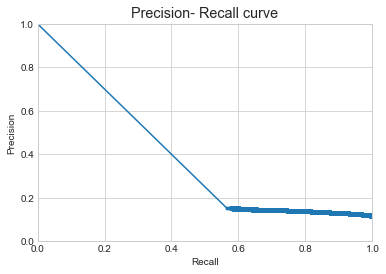

In [79]:
plt.plot(recall_LR,precision_LR,marker='.')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=12
plt.title('Precision- Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [80]:
coef1 = pd.Series(logmodel.coef_.ravel(), list(X_train.columns)).sort_values()
print(coef1)

marital_married       -3.426786
age_Middle-Aged       -3.306003
education_secondary   -3.275550
job_admin/manag       -3.108109
contact_cellular      -2.891409
age_Adult             -2.862794
education_tertiary    -2.788254
marital_single        -2.755502
contact_unknown       -2.749355
job_blue-collar       -2.513855
job_technician        -2.316785
education_primary     -2.025906
job_unemployed        -1.941040
job_home/service      -1.937139
marital_divorced      -1.788157
contact_telephone     -1.289427
job_self-employed     -1.068428
education_unknown     -1.060954
job_entrepreneur      -1.049095
age_Old               -0.990404
campaign              -0.372610
housing               -0.342843
loan                  -0.211073
default               -0.033610
pdays                  0.044194
previous               0.044197
balance                0.071663
poutcome               0.567850
dtype: float64


Since in this situation, if the model predicts that a costumer don't want to buy the term loan, and in reality he is willing to buy it. It will be a loss to the bank. Whereas, if a model predicts that customer is willing but he is not in reality, it does not cost much. 

Hence we have to minimize False Negatives(FN) as much as possible i.e. we have to increase the Recall score.

Lets proceed with cross validation of Logistic model followed by the Learning curve

In [81]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [82]:
scores = cross_val_score(logmodel , X = predictors , y=to_predict , scoring = 'roc_auc' , cv = 10)
scores

C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.62234938, 0.86336167, 0.82939079, 0.75118869, 0.57010149,
       0.68139893, 0.7886523 , 0.86197323, 0.8160663 , 0.72153153])

In [83]:
# Learning Curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from yellowbrick.model_selection import LearningCurve


C:\Users\91989\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [84]:
from sklearn.model_selection import StratifiedKFold

train_sizes , train_scores , test_scores = learning_curve(logmodel , X= X_resampled , y = y_resampled , cv = StratifiedKFold(10) , scoring = 'recall', train_sizes = np.linspace(0.3, 1.0, num=5))
print(train_sizes)
print(train_scores)
print(test_scores)

C:\Users\91989\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91989\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)


[17247 27308 37369 47430 57492]
[[       nan 0.17554992 0.17554992 0.17808799 0.17089679 0.15919395
  0.15919395 0.15919395 0.15919395 0.15919395]
 [0.00536193 0.17125861 0.17882287 0.1796677  0.17431709 0.17656998
  0.17685159 0.17628837 0.16613924 0.16613924]
 [0.84831265 0.66728517 0.57543778 0.57706135 0.574626   0.57578569
  0.57590166 0.57497391 0.57532181 0.57520584]
 [0.91201028 0.82824877 0.78623421 0.78682295 0.78612717 0.78698352
  0.78618069 0.78602012 0.78602012 0.78591308]
 [0.93167745 0.87768733 0.8500661  0.85027482 0.84999652 0.85041397
  0.84964865 0.84999652 0.84992695 0.84999652]]
[[       nan 0.12116468 0.11271133 0.10644959 0.10331872 0.10457107
  0.10457107 0.11271133 0.11208516 0.1039449 ]
 [0.00375704 0.11865999 0.11208516 0.10644959 0.10331872 0.10801503
  0.10895429 0.11427677 0.11521603 0.10707577]
 [0.06543519 0.69505322 0.96430808 0.9636819  0.96274264 0.95961177
  0.96681277 0.96587351 0.9636819  0.96399499]
 [0.12398247 0.69974953 0.96493425 0.96430808 0

[       nan 0.15714166 0.61199119 0.80305609 0.86096848]
[       nan 0.09978084 0.8471196  0.85410144 0.85623043]


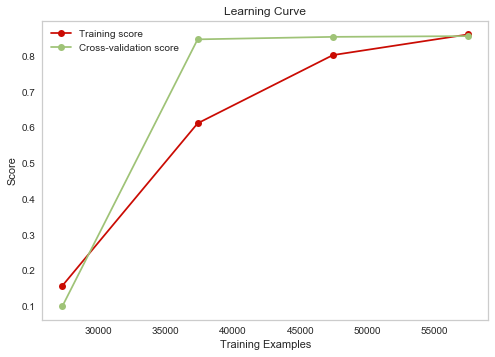

In [85]:
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

print(train_scores_mean)
print(test_scores_mean)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")

plt.legend(loc="best")
plt.show()

C:\Users\91989\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


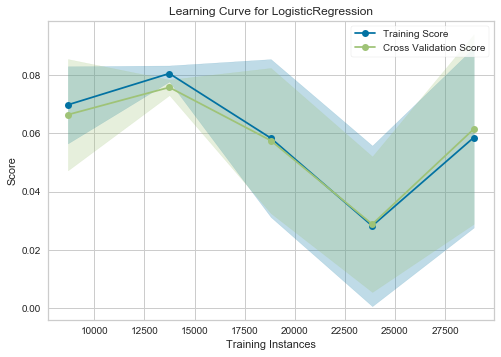

In [86]:
cv = KFold(5)
viz = LearningCurve(logmodel , cv = cv , train_sizes=np.linspace(0.3, 1.0, num=5) , scoring = 'recall' , n_jobs = 4)
# Fit and poof the visualizer
viz.fit(X = X_train, y = y_train )
viz.poof()


Now we create a model without resampling the data, instead giving weights to the imblanced classes.

Lets train a different Logistic Model by increasing the degree of features:

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)

In [88]:
logmodel_3 = LogisticRegression(solver = 'lbfgs' , random_state = 13 , class_weight = {0:1 ,1:7})

In [89]:
X_poly = poly.fit_transform(X_train)
logmodel_3.fit(X_poly , y_train)

LogisticRegression(class_weight={0: 1, 1: 7}, random_state=13)

In [90]:
#since we have only transformed train features and not the test features so while predicting it will throw an error if we not do it.
y_pred3 = logmodel_3.predict(poly.transform(X_test))

In [91]:
print(metrics.recall_score(y_test , y_pred3))


0.36644798500468606


We are getting better results in Linear features as compared to polynomial ones. Lets train our model on other algorithms.

## SVM

The important thing we should remember before applying SVM is that the data should always be scaled.

In [92]:
# scaling of data
X_train_SVM = X_train.copy()
scaler = StandardScaler().fit(X_train_SVM)

scaler.mean_
scaler.scale_ 

array([1.32561497e-01, 2.95353514e+03, 4.96989619e-01, 3.67435014e-01,
       3.06135225e+00, 1.00625264e+02, 2.40806234e+00, 1.80055723e-01,
       4.71293592e-01, 4.83451559e-01, 1.94564079e-01, 4.67928820e-01,
       4.10526569e-01, 1.79049492e-01, 3.22513789e-01, 1.83667764e-01,
       3.75482099e-01, 3.07520214e-01, 3.19641688e-01, 4.89539082e-01,
       4.50332714e-01, 3.57342284e-01, 4.99824495e-01, 4.56189311e-01,
       1.98638072e-01, 4.77203779e-01, 2.46359875e-01, 4.51813897e-01])

In [93]:
X_train_SVM = pd.DataFrame(scaler.transform(X_train_SVM))

In [94]:
from sklearn.svm import LinearSVC
from time import time

t0 = time()
lin_clf = LinearSVC(C=1)  #C is a hyperparameter that deals with margin to classification tradeoff
lin_clf.fit(X_train_SVM , y_train)

print("Training time:", round(time()-t0, 3), "s")
t1 = time()
pred = lin_clf.predict(X_test)

print("Prediction time:", round(time()-t1, 3), "s")

Score1 = metrics.recall_score(y_test , pred)
print(Score1)

Training time: 7.062 s
Prediction time: 0.005 s
0.8762886597938144


C:\Users\91989\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [95]:
#Lets look on some of the SVM with kernel and try to make a polynomial one
from sklearn.svm import SVC

clf2 = SVC(kernel = 'poly' , degree = 2 , C=0.001)

t0 = time()
clf2.fit(X_train_SVM, y_train)
print("Training time:", round(time()-t0, 3), "s")
t1 = time()
predic = clf2.predict(X_test)
print("Prediction time:", round(time()-t1, 3), "s")
recall = metrics.recall_score(y_test, predic)
print(recall)

Training time: 17.344 s
Prediction time: 2.275 s
0.6907216494845361


Lets proceed with its validation

As we know the best SVM is SVM with RBF(Radial Basis Function) kernel. Lets give it a try.

In [96]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
#param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              'kernel': ['rbf']} 
#
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
#t0 = time()
## fitting the model for grid search 
#grid.fit(X_train_SVM, y_train)
#print("Training time:", round(time()-t0, 3), "s")
#
#t1 = time()
#pred = grid.predict(X_test)
#print("Prediction time:", round(time()-t1, 3), "s")
#Score2 = metrics.recall_score(y_test, pred)
#print(Score2)



As we can see that SVM + GridSearch is a deadly combination of Time Consumption, hence i stopped it. But time is just a trade off for the accuracy of our model.

In [97]:
 #here gamma is a hyperparameter that specifies how important an example is.
clf = SVC(kernel="rbf",gamma=1,C=0.1 ) 
t0 = time()
clf.fit(X_train_SVM, y_train)
print("Training time:", round(time()-t0, 3), "s")
t1 = time()
prediction = clf.predict(X_test)
print("Prediction time:", round(time()-t1, 3), "s")
Score3 = metrics.recall_score(y_test, prediction)
print(Score3)

Training time: 115.737 s
Prediction time: 11.237 s
0.0


## DecisionTree

In [98]:
from sklearn.tree import DecisionTreeClassifier


As per practical evidences, we should not use one hot encoding while training the model on Decision Tree rather we should use Label Encoding Instead for Catagorical Features.
Note : it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns like above.

In [99]:
train_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,Middle-Aged,admin/manag,married,tertiary,0,2143,1,0,unknown,1,-1,0,0,0
1,Middle-Aged,technician,single,secondary,0,29,1,0,unknown,1,-1,0,0,0
2,Adult,entrepreneur,married,secondary,0,2,1,1,unknown,1,-1,0,0,0
3,Middle-Aged,blue-collar,married,unknown,0,1506,1,0,unknown,1,-1,0,0,0
4,Adult,unemployed,single,unknown,0,1,0,0,unknown,1,-1,0,0,0


Now we will apply label encoding to all the categorical features


In [100]:
# .cat.codes does not run on dtpye object it only runs on dtype 'category'
#for i in [col for col, dtype in train_2.dtypes.items() if dtype == 'object']:
#    if i in ['age','job','marital','education','contact']:
#        train_2[i] = train_2[i].astype('category')
#        train_2[i] = train_2[i].cat.codes
#        train_2[i] = train_2[i].astype('int64')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in ['age','job','marital','education','contact']:
    train_2[i] = le.fit_transform(train_2[i])
       

train_2.head()



,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,1,0,1,2,0,2143,1,0,2,1,-1,0,0,0
1,1,5,2,1,0,29,1,0,2,1,-1,0,0,0
2,0,2,1,1,0,2,1,1,2,1,-1,0,0,0
3,1,1,1,3,0,1506,1,0,2,1,-1,0,0,0
4,0,6,2,3,0,1,0,0,2,1,-1,0,0,0


In [101]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45201 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45201 non-null  int32
 1   job        45201 non-null  int32
 2   marital    45201 non-null  int32
 3   education  45201 non-null  int32
 4   default    45201 non-null  int64
 5   balance    45201 non-null  int64
 6   housing    45201 non-null  int64
 7   loan       45201 non-null  int64
 8   contact    45201 non-null  int32
 9   campaign   45201 non-null  int64
 10  pdays      45201 non-null  int64
 11  previous   45201 non-null  int64
 12  poutcome   45201 non-null  int64
 13  y          45201 non-null  int64
dtypes: int32(5), int64(9)
memory usage: 4.3 MB


In [102]:
predictors_2 = train_2.drop('y', axis = 1)
to_predict_2 = train_2['y']

In [103]:
X_train_2 , X_test_2, y_train_2  , y_test_2 = train_test_split(predictors_2 ,to_predict_2 ,test_size = 0.2 , random_state = 0 )

In [104]:
X_train_2.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36160 entries, 17266 to 2732
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        36160 non-null  int32
 1   job        36160 non-null  int32
 2   marital    36160 non-null  int32
 3   education  36160 non-null  int32
 4   default    36160 non-null  int64
 5   balance    36160 non-null  int64
 6   housing    36160 non-null  int64
 7   loan       36160 non-null  int64
 8   contact    36160 non-null  int32
 9   campaign   36160 non-null  int64
 10  pdays      36160 non-null  int64
 11  previous   36160 non-null  int64
 12  poutcome   36160 non-null  int64
dtypes: int32(5), int64(8)
memory usage: 3.2 MB


In [105]:
class_weight = int(y_train_2.value_counts()[0]/y_train_2.value_counts()[1])
print(class_weight)

7


Note: Any tree algorithm does not require any kind of scaling for the model to make a best fit. Hence we are not doing the same here.

In [106]:
from sklearn import model_selection
numfolds = 10
seed  = 7
Scoring = 'recall'
kfold = KFold(n_splits = numfolds)


As we can see that there is a huge difference in Training and validation score. Hence, Model is Overfitting.
Now, we try to tune it with hyperparameters(max_depth, min_samples_split)

In [107]:
tree_2 = DecisionTreeClassifier(max_depth = 3 , min_samples_split = 5 , class_weight = {0:1,1:class_weight})
tree_2.fit(X_train_2 , y_train_2)
print(tree_2.score(X_train_2,y_train_2))

results1 = model_selection.cross_val_score(tree_2, X_train_2, 
                                            y_train_2, cv=kfold,
                                            scoring=Scoring)

#Print cross validation score
print(results1.mean(), results1.std())

0.6596238938053097
0.6517171746161631 0.02005484255751594


In [108]:
tree_2_pred = tree_2.predict(X_test_2)

In [109]:
print(classification_report(y_test_2 , tree_2_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      7974
           1       0.21      0.64      0.32      1067

    accuracy                           0.67      9041
   macro avg       0.57      0.66      0.55      9041
weighted avg       0.85      0.67      0.73      9041



In [110]:
y_pred_pos = tree_2.predict_proba(X_test_2)[:,1]
y_pred_pos

array([0.57050938, 0.39731565, 0.39731565, ..., 0.1777396 , 0.25768008,
       0.25768008])

In [111]:
Dec_2_train_performance = evaluate_performance('Decision Tree' , tree_2 , 'Train(CV =5)' , X_train_2 ,X_test_2 ,  y_train_2 , y_test_2)
Dec_2_train_performance

,approach,acc,precision,recall,f1,auc,name
0,Train(CV =5),0.6596,0.2025,0.6519,0.3088,0.7024,Decision Tree


In [112]:
Dec_2_test_performance = evaluate_performance('Decision Tree' , tree_2 , 'Test' , X_train_2 ,X_test_2 ,  y_train_2 , y_test_2 , test = True)
Dec_2_test_performance

,approach,acc,precision,recall,f1,auc,name
0,Test,0.6705,0.2091,0.6439,0.3156,0.7063,Decision Tree


In [113]:
print(tree_2.feature_importances_)

[0.         0.         0.         0.         0.         0.00836875
 0.13537321 0.         0.30505985 0.         0.0013867  0.00075395
 0.54905753]


In [114]:
#Plotting Precision-Recall curve
#Generate the precision-recall curve for the classifier:
precision_tree_2, recall_tree_2 , thresholds_tree_2 = precision_recall_curve(y_test_2, y_pred_pos)
print(precision_tree_2)
print(recall_tree_2)
print(thresholds_tree_2)

[0.11801792 0.11792035 0.12941919 0.14934759 0.20906878 0.66216216
 0.66326531 0.68663594 1.        ]
[1.         0.99906279 0.9606373  0.89034677 0.64386129 0.1836926
 0.18275539 0.13964386 0.        ]
[0.         0.1777396  0.25768008 0.39731565 0.57050938 0.58333333
 0.88839286 0.94378353]


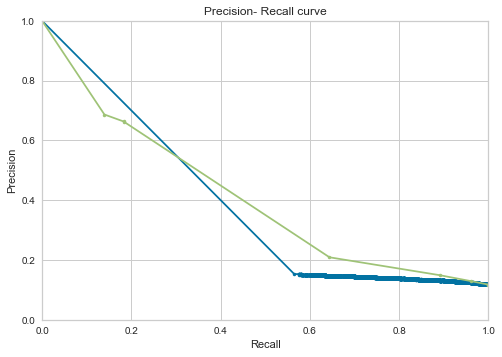

In [115]:
plt.plot(recall_LR,precision_LR,marker='.' , label = 'Logistic Regression')
plt.plot(recall_tree_2 ,precision_tree_2, marker = '.' , label = 'Decision Tree' )
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=12
plt.title('Precision- Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

C:\Users\91989\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


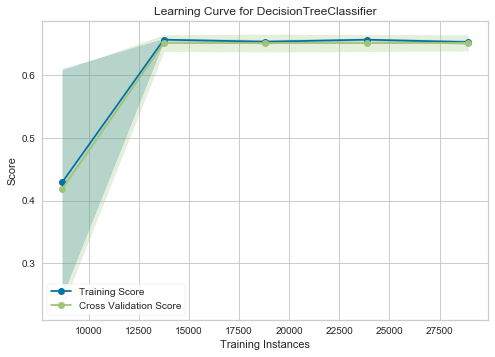

In [116]:
viz_tree = LearningCurve(tree_2 , cv = 5 , train_sizes=np.linspace(0.3, 1.0, num=5),
    scoring='recall', n_jobs=4)
viz_tree.fit(X = X_train_2 , y= y_train_2)
viz_tree.poof()


## Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

As RandomForest is an Ensemble technique using Decision Trees, hence we can use same data sets which we used for decision tree algorithm.

In [118]:
forest = RandomForestClassifier(max_depth = 10 , min_samples_split = 5 , n_estimators = 100 , random_state = 1 , class_weight = {0:1,1:class_weight})
forest.fit(X_train_2 , y_train_2)


#print the score of fitted random forest
print(forest.score(X_train_2, y_train_2))

#cross-validation
cr_val = cross_val_score(forest , X_train_2 , y_train_2 ,cv = 5 , scoring = 'recall')

#Print cross validation score
print("Recall")
print(cr_val.mean(), cr_val.std())

0.8138827433628318
Recall
0.5421800947867299 0.01389037999028705


Now, Lets tune the HyperParameters usind GridSearchCV

In [119]:
# Defining hyperparameters
forest_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', {0:1,1:class_weight}]
}

In [120]:
grid = GridSearchCV(RandomForestClassifier(), forest_param_grid, refit = True, verbose = 3)
# fitting the model for grid search 
grid = grid.fit(X_train_2, y_train_2)
pred_grid = grid.predict(X_test_2)
Score3 = metrics.recall_score(y_test, pred_grid)


Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42, score=0.706, total=   0.4s
[CV] bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42, score=0.729, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42, score=0.735, total=   0.4s
[CV] bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42, score=0.696, total=   0.4s
[CV] bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=50, random_state=42, score=0.712, total=   0.4s
[CV] bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=100, random_state=42, score=0.721, total=   0.7s
[CV] bootstrap=True, class_weight=balanced, max_depth=3, max_features=auto, n_estimators=100, random_state=42 
[CV] 

KeyboardInterrupt: 

In [ ]:
print(Score3)

In [ ]:
print(grid.best_params_)

Lets train a different model using the hyperparameters that were provided by grid search.

In [121]:
forest2 = RandomForestClassifier(bootstrap = True ,min_samples_split = 100, max_depth =70, max_features = 'auto', n_estimators = 100, random_state = 42 , class_weight = {0: 1, 1: 7})
forest2.fit(X_train_2 , y_train_2)

RandomForestClassifier(class_weight={0: 1, 1: 7}, max_depth=70,
                       min_samples_split=100, random_state=42)

In [122]:
pred_RF2 = forest2.predict(X_test_2)

In [123]:
print(metrics.classification_report(y_test_2 , pred_RF2))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7974
           1       0.31      0.52      0.39      1067

    accuracy                           0.81      9041
   macro avg       0.62      0.68      0.64      9041
weighted avg       0.86      0.81      0.83      9041



In [124]:
print(forest2.score(X_test_2 , y_test_2))

0.8073221988718062


In [125]:
RF_train_performance = evaluate_performance('Random Forest' , forest2 , 'Train(CV =5)' , X_train_2 ,X_test_2 ,  y_train_2 , y_test_2)
RF_train_performance

,approach,acc,precision,recall,f1,auc,name
0,Train(CV =5),0.8104,0.317,0.5405,0.3995,0.76,Random Forest


In [126]:
RF_test_performance = evaluate_performance('Random Forest' , forest2 , 'Test' , X_train_2 ,X_test_2 ,  y_train_2 , y_test_2 , test = True)
RF_test_performance

,approach,acc,precision,recall,f1,auc,name
0,Test,0.8073,0.3111,0.5211,0.3896,0.7516,Random Forest


In [127]:
y_pred_pos_forest2 = forest2.predict_proba(X_test_2)[:,1]

In [128]:
#Plotting Precision-Recall curve
#Generate the precision-recall curve for the classifier:
precision_tree_3, recall_tree_3 , thresholds_tree_3 = precision_recall_curve(y_test_2, y_pred_pos_forest2)
print(precision_tree_2)
print(recall_tree_2)
print(thresholds_tree_2)

[0.11801792 0.11792035 0.12941919 0.14934759 0.20906878 0.66216216
 0.66326531 0.68663594 1.        ]
[1.         0.99906279 0.9606373  0.89034677 0.64386129 0.1836926
 0.18275539 0.13964386 0.        ]
[0.         0.1777396  0.25768008 0.39731565 0.57050938 0.58333333
 0.88839286 0.94378353]


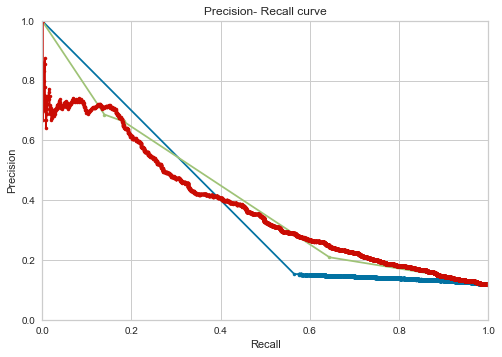

In [129]:
plt.plot(recall_LR,precision_LR,marker='.' , label = 'Logistic Regression')
plt.plot(recall_tree_2 ,precision_tree_2, marker = '.' , label = 'Decision Tree' )
plt.plot(recall_tree_3 ,precision_tree_3, marker = '.' , label = 'Random Forest' )
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=12
plt.title('Precision- Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

C:\Users\91989\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


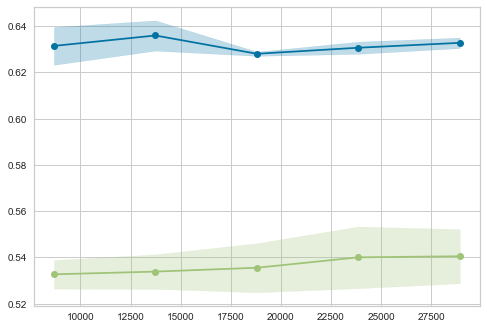

In [130]:
viz_RF = LearningCurve(forest2 , train_sizes = np.linspace(0.3, 1.0, num=5) , cv = 5 , scoring = 'recall' , n_jobs = 4)
viz_RF.fit(X_train_2 , y_train_2)
viz.poof()

Let's save our training data in a numpy file..So that it could be used as a input to neural networks.

In [131]:
train_arr = train_2.to_numpy()

In [132]:
print(train_arr)
train_arr.shape

[[ 1  0  1 ...  0  0  0]
 [ 1  5  2 ...  0  0  0]
 [ 0  2  1 ...  0  0  0]
 ...
 [ 2  6  1 ...  3  1  1]
 [ 1  1  1 ...  0  0  0]
 [ 1  2  1 ... 11  0  0]]


(45201, 14)

In [133]:
np.save('Bank_Term.npy',train_arr)

## Ensembling

## Voting

In [134]:
from sklearn.ensemble import VotingClassifier

In [135]:
eclf = VotingClassifier(estimators = [('lr' , logmodel) , ('dt' , tree_2) , ('rf', forest2)])

In [136]:
eclf.fit(X_train_2,y_train_2)

C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(class_weight={0: 1, 1: 7},
                                                     max_depth=3,
                                                     min_samples_split=5)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 7},
                                                     max_depth=70,
                                                     min_samples_split=100,
                                                     random_state=42))])

In [137]:
#checking the accuracy of each classifier
for clf, label in zip([logmodel, lin_clf, tree_2, forest,eclf], ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X_train_2, y_train_2, cv=5, scoring='recall')
    print("accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

accuracy: 0.01 (+/- 0.01) [Logistic Regression]


C:\Users\91989\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

accuracy: 0.27 (+/- 0.21) [SVM]
accuracy: 0.65 (+/- 0.01) [Decision Tree]
accuracy: 0.54 (+/- 0.01) [Random Forest]


C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

accuracy: 0.51 (+/- 0.01) [Ensemble]


In [138]:
#Lets try soft voting by giving some weights to the classifiers
eclf2 = VotingClassifier(estimators = [('lr' , logmodel), ('dt' , tree_2) , ('rf', forest2)] , voting = 'soft' ,  weights = [1,3,3])
eclf2.fit(X_train_2,y_train_2)

C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(class_weight={0: 1, 1: 7},
                                                     max_depth=3,
                                                     min_samples_split=5)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 7},
                                                     max_depth=70,
                                                     min_samples_split=100,
                                                     random_state=42))],
                 voting='soft', weights=[1, 3, 3])

In [139]:
VC_train_performance = evaluate_performance('Voting Classifier' , eclf2 , 'Train(CV =5)' , X_train_2 ,X_test_2 ,  y_train_2 , y_test_2)
VC_train_performance

C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

,approach,acc,precision,recall,f1,auc,name
0,Train(CV =5),0.8341,0.3499,0.4879,0.4067,0.7545,Voting Classifier


In [140]:
VC_test_performance = evaluate_performance('Voting Classifier' , eclf2 , 'Test' , X_train_2 ,X_test_2 ,  y_train_2 , y_test_2 , test = True)
VC_test_performance

,approach,acc,precision,recall,f1,auc,name
0,Test,0.8324,0.348,0.4808,0.4038,0.7501,Voting Classifier


## Boosting via XGBoostClassifier

In [141]:
from xgboost import XGBClassifier

In [142]:
#Using standard XGBoostClassifier 
xgb = XGBClassifier(seed=42 , learning_rate = 0.001 , n_esimators = 300)
xgb.fit(X_train_2,y_train_2)

[15:37:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_esimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_esimators=300, n_estimators=100, n_jobs=0, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [143]:
xgb_pred = xgb.predict(X_test_2)
print(metrics.accuracy_score(y_test_2,xgb_pred))

0.8929321977657338


In [144]:
print(metrics.recall_score(y_test_2, xgb_pred))

0.17150890346766634


In [145]:
print(metrics.f1_score(y_test_2 , xgb_pred))

0.27436281859070466


Now, lets try to train a model with XGBClassifier by providing the class weights

In [146]:
xgb_2 = XGBClassifier(scale_pos_weight=class_weight,seed=42, learning_rate = 0.001 )
xgb_2.fit(X_train_2,y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=7, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [147]:
xgb_pred_2 = xgb_2.predict(X_test_2)
print(metrics.recall_score(y_test_2,xgb_pred_2))

0.5726335520149953


In [148]:
print(metrics.accuracy_score(y_test_2,xgb_pred))

0.8929321977657338


In [149]:
print(metrics.f1_score(y_test_2,xgb_pred_2))

0.35104854926745194


In [150]:
XGB_train_performance = evaluate_performance('XGBoost Classifier' , xgb_2 , 'Train(CV =5)' , X_train_2 ,X_test_2 ,  y_train_2 , y_test_2)
XGB_train_performance

,approach,acc,precision,recall,f1,auc,name
0,Train(CV =5),0.7645,0.2664,0.5685,0.3614,0.7401,XGBoost Classifier


In [151]:
XGB_test_performance = evaluate_performance('XGBoost Classifier' , xgb_2 , 'Test' , X_train_2 ,X_test_2 ,  y_train_2 , y_test_2 , test = True)
XGB_test_performance

,approach,acc,precision,recall,f1,auc,name
0,Test,0.7501,0.2531,0.5726,0.351,0.7333,XGBoost Classifier


# Analyzing the performance of all the Models

In [152]:
models_list = [LR_train_performance , LR_test_performance  , Dec_2_train_performance , Dec_2_test_performance , RF_train_performance , RF_test_performance , VC_train_performance , VC_test_performance , XGB_train_performance , XGB_test_performance ]


In [153]:
all_performance = pd.DataFrame()
for i in models_list:
    all_performance = all_performance.append(i)

all_performance.set_index('name' , inplace = True)

In [154]:
all_performance

,approach,acc,precision,recall,f1,auc
name,,,,,,
Logistic Regression,Train(CV =5),0.9184,0.9841,0.8506,0.8918,0.9227
Logistic Regression,Test,0.3508,0.1353,0.8351,0.2329,0.5925
Decision Tree,Train(CV =5),0.6596,0.2025,0.6519,0.3088,0.7024
Decision Tree,Test,0.6705,0.2091,0.6439,0.3156,0.7063
Random Forest,Train(CV =5),0.8104,0.3170,0.5405,0.3995,0.7600
Random Forest,Test,0.8073,0.3111,0.5211,0.3896,0.7516
Voting Classifier,Train(CV =5),0.8341,0.3499,0.4879,0.4067,0.7545
Voting Classifier,Test,0.8324,0.3480,0.4808,0.4038,0.7501
XGBoost Classifier,Train(CV =5),0.7645,0.2664,0.5685,0.3614,0.7401


# Features Importances

since we have huge class imbalance, we cannot predict feature importance with that. Hence, we take 5 different sets of higher class and same lower class on those 5 sets and train them and find Feature Importance with them. Finally what we do is..we take the average of all the feature importances and plot them for analyzing.

In [155]:
FI_all = [[]]
for i in range(5):
    df = train_2[train_2.y == 0].sample(frac = 0.11)
    df = df.append(train_2[train_2.y == 1])
    label = df['y']
    df = df.drop('y' , axis = 1)
    RF_FI = RandomForestClassifier(max_depth = 10 , min_samples_split = 5 , n_estimators = 100 , random_state = 1 )
    RF_FI.fit(df , label)
    FI = RF_FI.feature_importances_
    if i == 0:
        FI_all = np.append(FI_all , [FI] , axis =1)
    else :
        FI_all = np.append(FI_all , [FI] , axis = 0)
    
print(FI_all)

[[0.06187645 0.04858715 0.04659318 0.0325225  0.00590889 0.16294687
  0.08445381 0.02091077 0.15187337 0.07690155 0.10380152 0.05435225
  0.14927168]
 [0.06135335 0.05155527 0.04255823 0.03449527 0.00717811 0.13966991
  0.09657527 0.02733254 0.16823473 0.07056505 0.09807331 0.0563838
  0.14602516]
 [0.06597487 0.04920004 0.04505439 0.03230304 0.00676898 0.15017629
  0.08511948 0.02457511 0.16589375 0.07113415 0.09885292 0.04917534
  0.15577163]
 [0.05633497 0.05039767 0.04639824 0.03538521 0.00626677 0.14749911
  0.0860095  0.02922916 0.16567948 0.07258861 0.09946492 0.05351469
  0.15123166]
 [0.05296613 0.05061613 0.03715123 0.03384324 0.0054491  0.14366739
  0.09216207 0.02483892 0.1671154  0.07291726 0.10574366 0.0545001
  0.15902938]]


In [156]:
FI_avg = np.mean(FI_all, axis = 0)
FI_avg

array([0.05970115, 0.05007125, 0.04355105, 0.03370985, 0.00631437,
       0.14879191, 0.08886403, 0.0253773 , 0.16375935, 0.07282133,
       0.10118727, 0.05358524, 0.1522659 ])

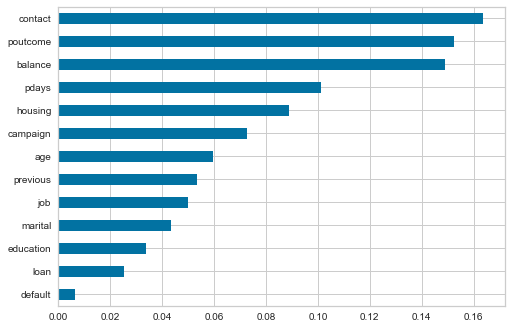

In [157]:
pd.Series(FI_avg , index = df.columns).sort_values().plot(kind = 'barh')

# Creating a pickle file of Best Classifier Choosen

After analyzing all the trained classifier, we opt for the best one and we proceed for its deployment. For that to happen, we need to create the pickle file for that specific traind classifier.

In [158]:
# Create a picle file using serialization

import pickle
pickle_out = open('forest2.pkl' , 'wb')
pickle.dump(forest2 , pickle_out)
pickle_out.close()

Now we will make another .py file to make a "Rest API" of the classifier that we have trained